In [80]:
# %%

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, MinMaxScaler,StandardScaler
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pmdarima as pm
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)




In [81]:
# Load data
FD001_data = pd.read_csv('CMAPSSData/train_FD001.txt',delim_whitespace=True)
pd.set_option('display.max_rows', None)

#FD001_data.info()

# List of sensor names
sensor_names =['Fan inlet temperature ◦R', 'LPC outlet temperature ◦R', 
'HPC outlet temperature ◦R', 'LPT outlet temperature ◦R',
'Fan inlet Pressure psia', 'bypass-duct pressure psia',
'HPC outlet pressure psia', 'Physical fan speed rpm',
'Physical core speed rpm', 'Engine pressure ratioP50/P2',
'HPC outlet Static pressure psia', 'Ratio of fuel flow to Ps30 pps/psia',
'Corrected fan speed rpm', 'Corrected core speed rpm', 'Bypass Ratio ', 
'Burner fuel-air ratio', 'Bleed Enthalpy', 'Required fan speed', 
'Required fan conversion speed', 'High-pressure turbines Cool air flow', 
'Low-pressure turbines Cool air flow']

#Setting dict to store new names for colummns 
operational_dict = {
    '1':'Unit',
    '1.1':'Cycles',
    '-0.0007': 'Operational Setting 1',
    '-0.0004': 'Operational Setting 2',
    '100.0': 'Operational Setting 3',
}

#Creating a list of columns names
old_columns = list(FD001_data.columns)

#Removing column names found in operational_dict
operational_columns_to_rename = [col for col in old_columns if col not in operational_dict.keys()]

#Combining the two lists into a dict using tuple type casting
converged_names = dict(map(lambda i,j : (i,j) , operational_columns_to_rename,sensor_names))

# Combine both dictionaries (operational_dict and converged_names) ** is just short hand combining of the dictionary
all_rename_dict = {**operational_dict, **converged_names}

# Renaming columns in the dataframe
FD001_data.rename(columns=all_rename_dict, inplace=True)
print(FD001_data.info())










<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20630 entries, 0 to 20629
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unit                                  20630 non-null  int64  
 1   Cycles                                20630 non-null  int64  
 2   Operational Setting 1                 20630 non-null  float64
 3   Operational Setting 2                 20630 non-null  float64
 4   Operational Setting 3                 20630 non-null  float64
 5   Fan inlet temperature ◦R              20630 non-null  float64
 6   LPC outlet temperature ◦R             20630 non-null  float64
 7   HPC outlet temperature ◦R             20630 non-null  float64
 8   LPT outlet temperature ◦R             20630 non-null  float64
 9   Fan inlet Pressure psia               20630 non-null  float64
 10  bypass-duct pressure psia             20630 non-null  float64
 11  HPC outlet pres

Skewness of Fan inlet temperature ◦R: 0.0
Skewness of LPC outlet temperature ◦R: 0.316583501137655
Skewness of HPC outlet temperature ◦R: 0.3089193176181448
Skewness of LPT outlet temperature ◦R: 0.4431150548728743
Skewness of Fan inlet Pressure psia: 0.0
Skewness of bypass-duct pressure psia: -6.916635002907901
Skewness of HPC outlet pressure psia: -0.3942606916976628
Skewness of Physical fan speed rpm: 0.47934011995066556
Skewness of Physical core speed rpm: 2.5553469250442564
Skewness of Engine pressure ratioP50/P2: 0.0
Skewness of HPC outlet Static pressure psia: 0.4692823094660817
Skewness of Ratio of fuel flow to Ps30 pps/psia: -0.4423533166145076
Skewness of Corrected fan speed rpm: 0.46972290073323913
Skewness of Corrected core speed rpm: 2.3724704578719185
Skewness of Bypass Ratio : 0.3881823266382687
Skewness of Burner fuel-air ratio: 0.0
Skewness of Bleed Enthalpy: 0.35304226645162856
Skewness of Required fan speed: 0.0
Skewness of Required fan conversion speed: 0.0
Skewness

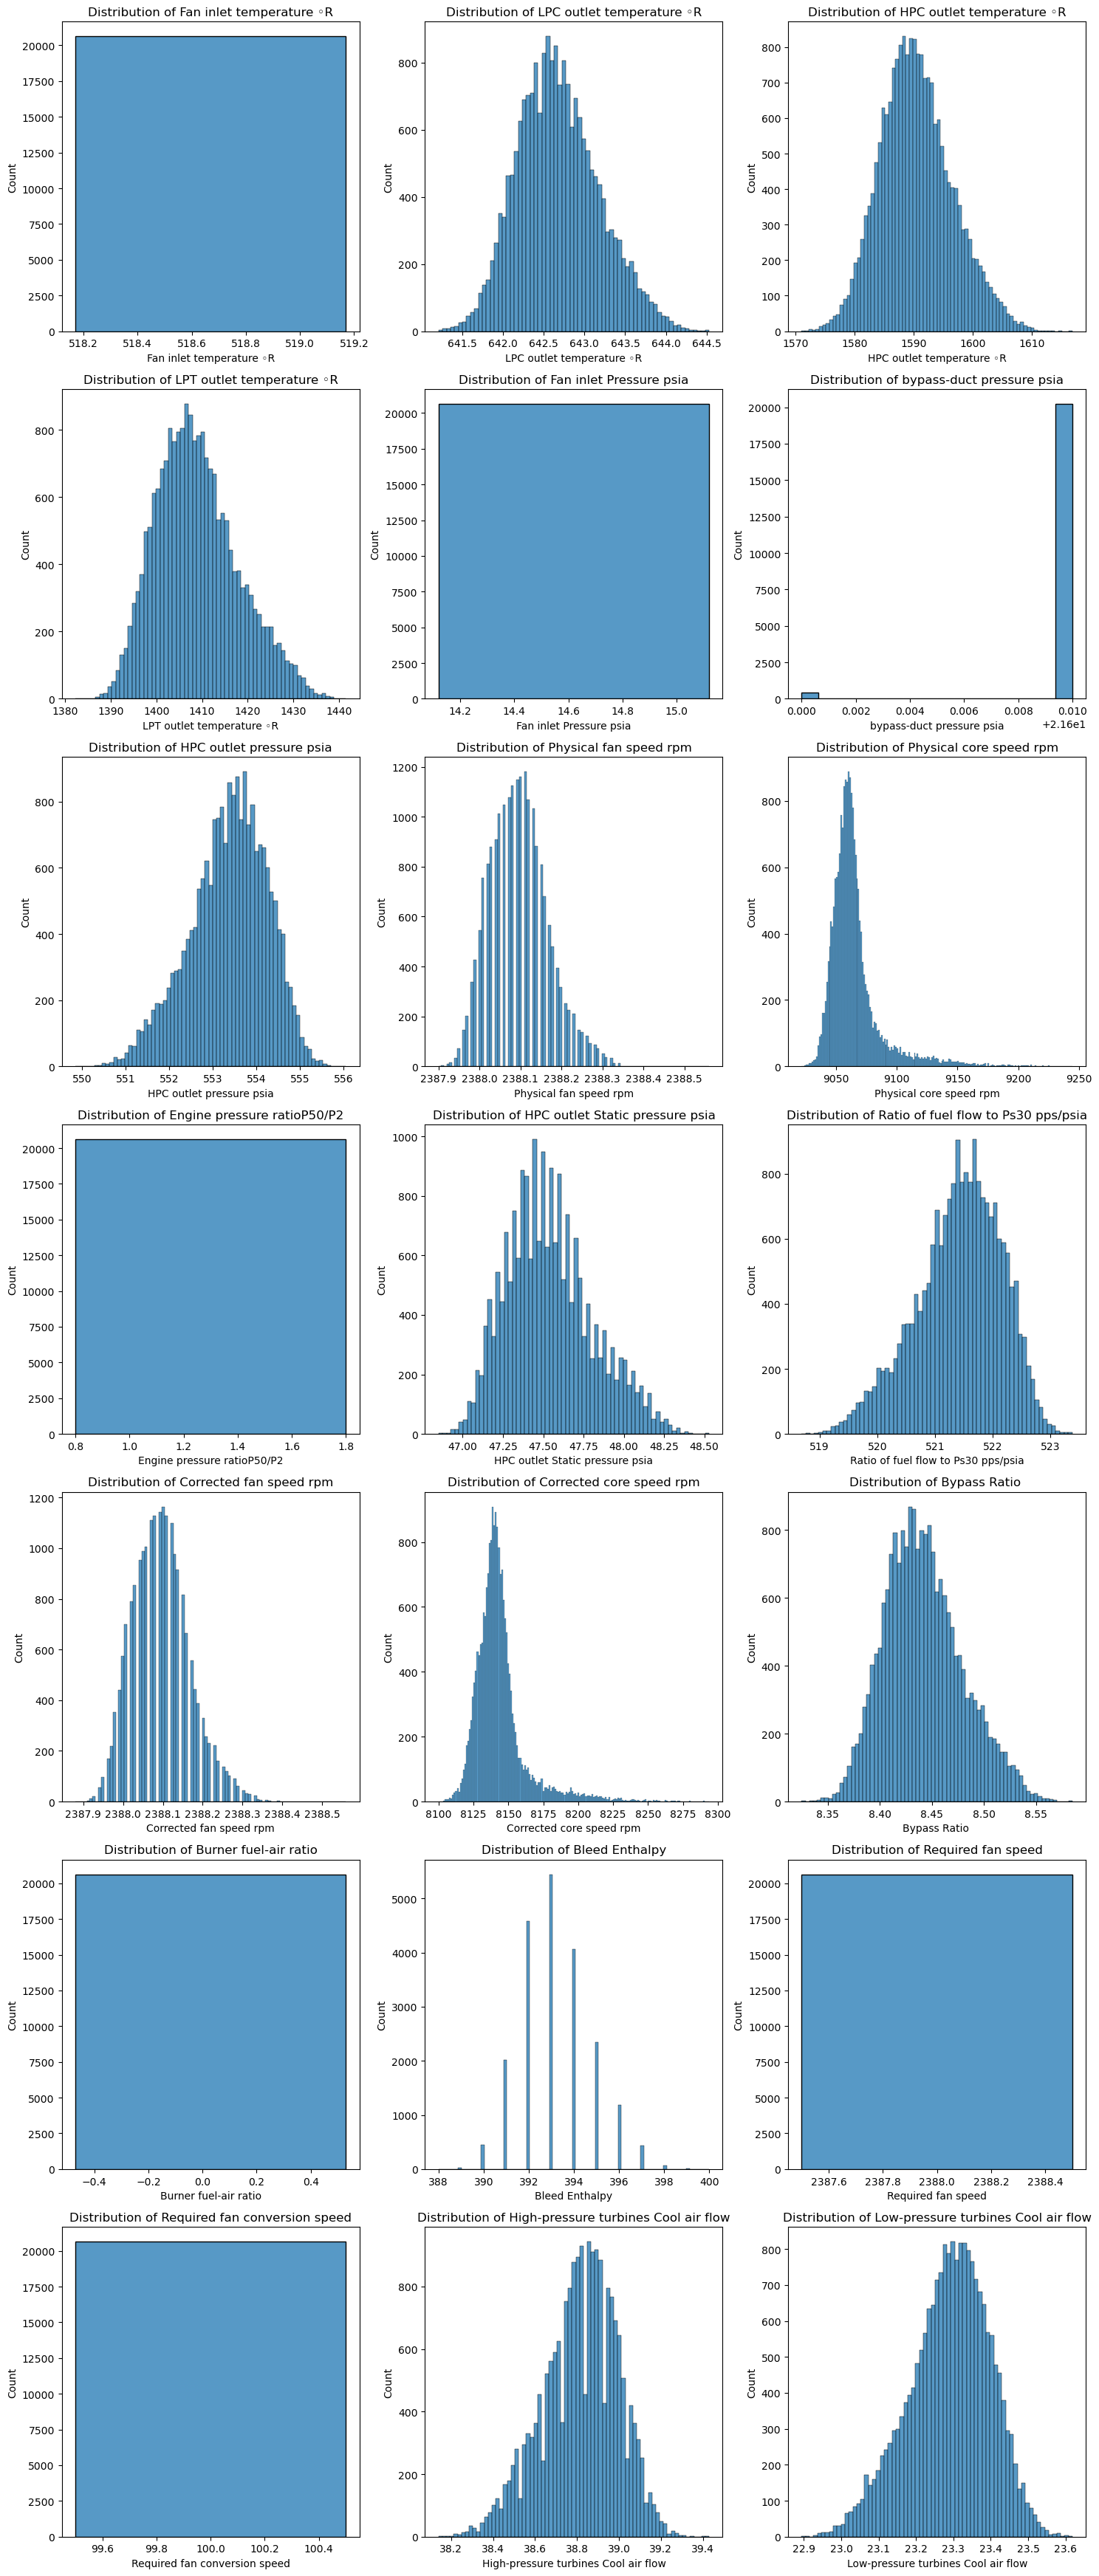

Columns that need normalization: ['bypass-duct pressure psia', 'Physical core speed rpm', 'Corrected core speed rpm']


In [82]:
columns_to_normalize = []

# Determine the number of rows and columns for the subplot grid
num_columns = len([col for col in FD001_data.columns if col in sensor_names])
num_rows = int(np.ceil(num_columns / 3)) #Making columns

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  
axes = axes.flatten()  # Flatten to easily iterate over it

# Loop through each column and create an individual plot (only sensor names)
for i, column in enumerate(FD001_data[sensor_names]):
    if column in sensor_names:
        sns.histplot(data=FD001_data[column], ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        skewness = FD001_data[column].skew()
        print(f'Skewness of {column}: {skewness}')
        
        # Check if the skewness is outside the range of -0.5 to 0.5
        if skewness < -0.5 or skewness > 0.5:
            columns_to_normalize.append(column)

# Hide any unused subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print the columns that need normalization
print(f'Columns that need normalization: {columns_to_normalize}')


In [83]:
#Calculate HPC_PR, Unit = psia

normalized_data['HPC_PR'] = (normalized_data['HPC Outlet Temperature']/normalized_data['Fan Inlet Temperature'])

engine = normalized_data.groupby('Engine No.')[['Cycles']].agg(['mean','std','max'])
print(engine)

KeyError: 'HPC Outlet Temperature'

<Axes: ylabel='Frequency'>

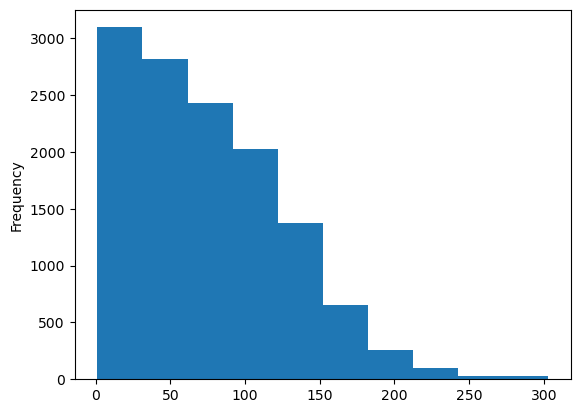

In [ ]:
normalized_data['Cycles'].plot.hist()

<Axes: ylabel='Frequency'>

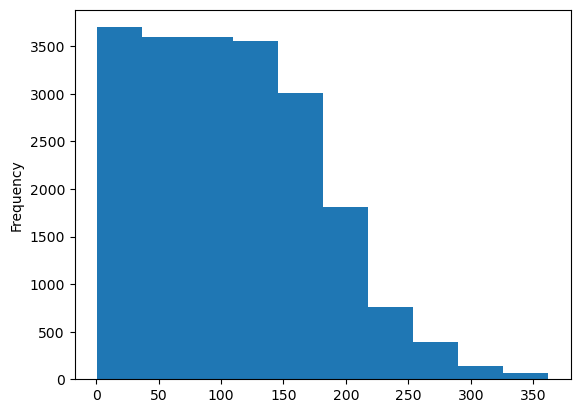

In [ ]:
start_data['1.1'].plot.hist()